In [ ]:
from google.colab import files

# Wgrywanie plików
uploaded = files.upload()


Saving dania.rybne.csv to dania.rybne.csv
Saving Dania.rybne.opis.txt to Dania.rybne.opis.txt


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline


In [ ]:
data = pd.read_csv(r"dania.rybne.csv")


print("pierwsze 5 wierszy danych:")
print(data.head())

print("\ninformacje o danych:")
print(data.info())

print("\nstatystyki opisowe:")
print(data.describe())

print("\nrozmiar danych:")
print(data.shape)

print("\nkolumny w zbiorze danych:")
print(data.columns)

pierwsze 5 wierszy danych:
  id;V1;V2;V3;V4;V5;V6;V7;V8;V9;V10;V11;V12;V13
0                   5;5;1;4;2;3;4;3;1;3;2;4;4;3
1                   8;4;1;1;5;1;4;4;3;5;1;5;3;2
2                  15;2;1;1;1;1;1;2;2;1;2;1;1;2
3                  17;4;3;4;4;4;4;4;4;4;4;4;4;3
4                  18;4;2;3;3;4;3;2;2;4;4;5;4;3

informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   id;V1;V2;V3;V4;V5;V6;V7;V8;V9;V10;V11;V12;V13  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None

statystyki opisowe:
       id;V1;V2;V3;V4;V5;V6;V7;V8;V9;V10;V11;V12;V13
count                                           1000
unique                                          1000
top                      5;5;1;4;2;3;4;3;1;3;2;4;4;3
freq                                               1

r

In [ ]:
df = pd.read_csv(r"dania.rybne.csv", sep=";")
# Pierwsza kolumna to id, kolejne dane to dane numeryczne
df[df.columns.drop('id')] = df[df.columns.drop('id')].apply(pd.to_numeric)
print(df.head())
print(df.info())

# Wczytywanie
with open(r"Dania.rybne.opis.txt", "r", encoding="utf-8") as f:
    comments = f.read().splitlines()
print("\nkomentarze:")
for c in comments:
    print(c)
    # Przygotowanie do grupowania
X = df.drop("id", axis=1)

   id  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13
0   5   5   1   4   2   3   4   3   1   3    2    4    4    3
1   8   4   1   1   5   1   4   4   3   5    1    5    3    2
2  15   2   1   1   1   1   1   2   2   1    2    1    1    2
3  17   4   3   4   4   4   4   4   4   4    4    4    4    3
4  18   4   2   3   3   4   3   2   2   4    4    5    4    3
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1000 non-null   int64
 1   V1      1000 non-null   int64
 2   V2      1000 non-null   int64
 3   V3      1000 non-null   int64
 4   V4      1000 non-null   int64
 5   V5      1000 non-null   int64
 6   V6      1000 non-null   int64
 7   V7      1000 non-null   int64
 8   V8      1000 non-null   int64
 9   V9      1000 non-null   int64
 10  V10     1000 non-null   int64
 11  V11     1000 non-null   int64
 12  V12     1000 non-null   int

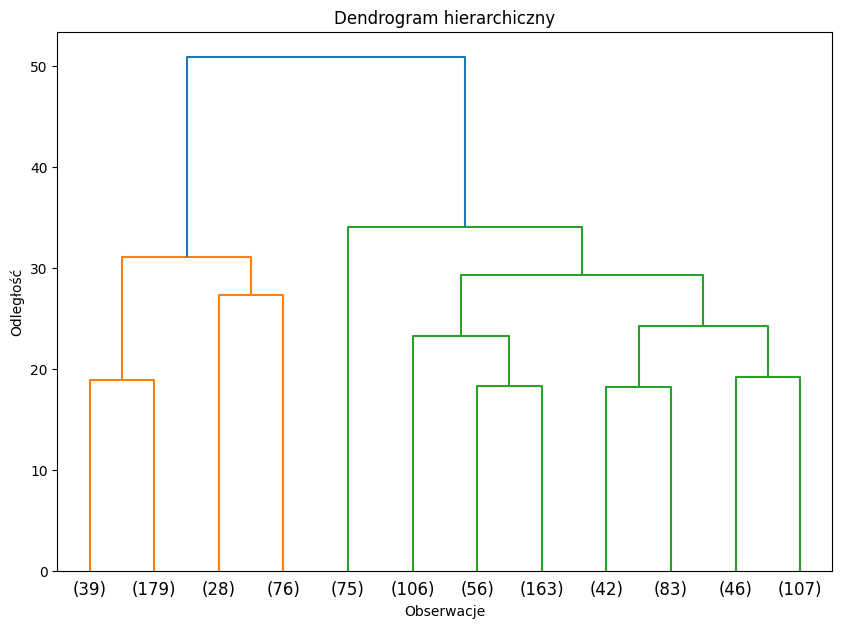

In [ ]:
# Grupowanie hierarchiczne
# Obliczenie macierzy połączeń metodą ward
Z = linkage(X, method='ward')

plt.figure(figsize=(10,7))
dendrogram(Z, truncate_mode='lastp', p=12)
plt.title('Dendrogram hierarchiczny')
plt.xlabel('Obserwacje')
plt.ylabel('Odległość')
plt.show()

In [ ]:
# Budowa 5 modeli z różną liczbą skupień
hc_models = {}
for k in [2, 3, 4, 5, 6]:
    hc_models[f'hc_{k}'] = fcluster(Z, k, criterion='maxclust')

#Ramka danych z przypisanymi segmentami
df_hc = pd.concat([df.reset_index(drop=True), pd.DataFrame(hc_models)], axis=1)
print("Przykładowe przypisania segmentów (grupowanie hierarchiczne):")
print(df_hc.head())

Przykładowe przypisania segmentów (grupowanie hierarchiczne):
   id  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  hc_2  hc_3  \
0   5   5   1   4   2   3   4   3   1   3    2    4    4    3     2     3   
1   8   4   1   1   5   1   4   4   3   5    1    5    3    2     1     1   
2  15   2   1   1   1   1   1   2   2   1    2    1    1    2     1     1   
3  17   4   3   4   4   4   4   4   4   4    4    4    4    3     2     3   
4  18   4   2   3   3   4   3   2   2   4    4    5    4    3     2     3   

   hc_4  hc_5  hc_6  
0     4     5     6  
1     1     1     1  
2     2     2     2  
3     4     4     5  
4     4     4     5  


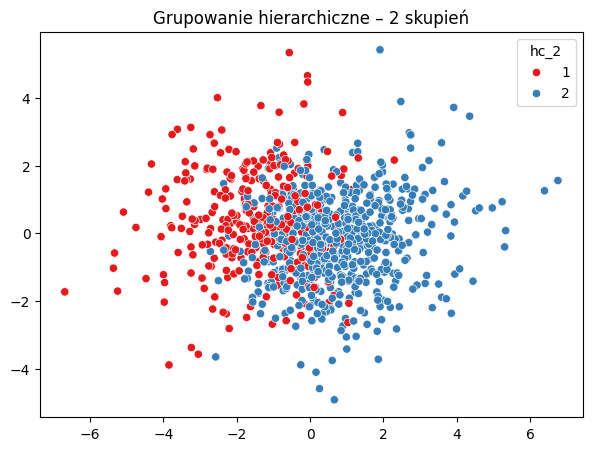

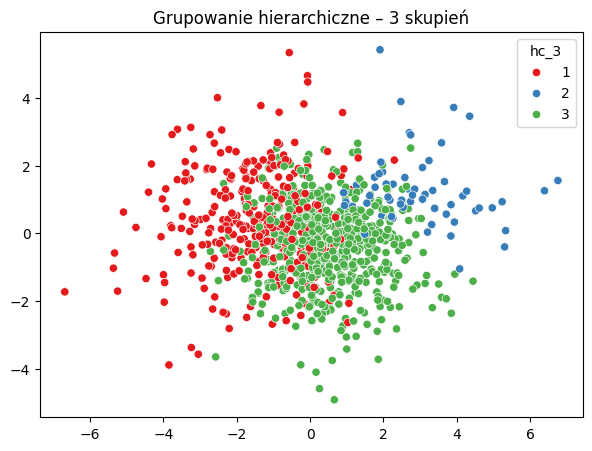

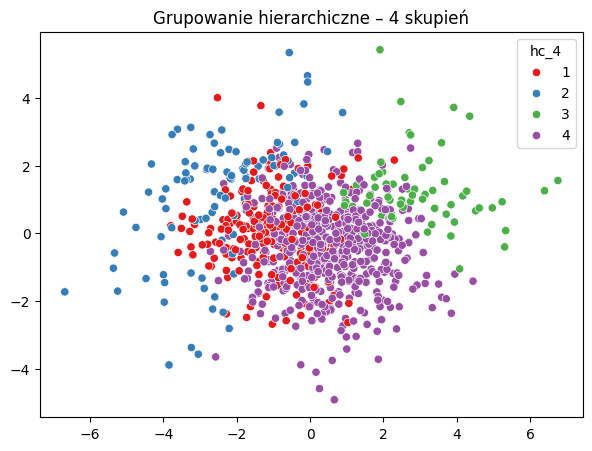

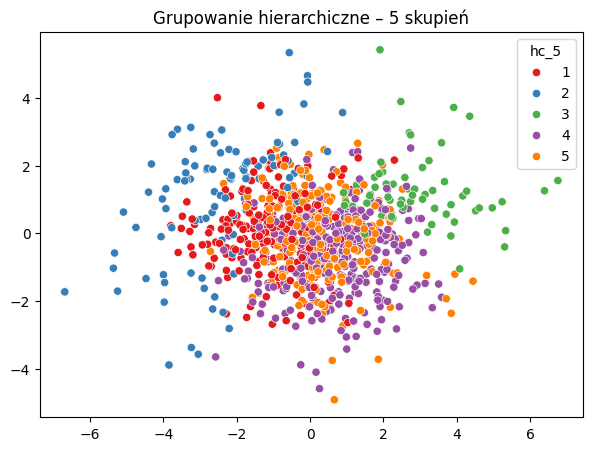

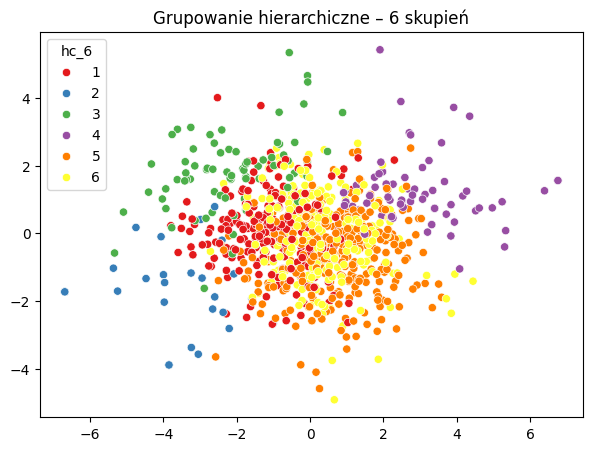

In [ ]:
#Wizualizacja, redukcja wymiarów za pomocą metody PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
for k in [2, 3, 4, 5, 6]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_hc[f'hc_{k}'], palette='Set1')
    plt.title(f'Grupowanie hierarchiczne – {k} skupień')
    plt.show()

In [ ]:
#Drzewo decyzyjne dla modelu z 3 skupieniami
y_hc = df_hc['hc_3']
X_train, X_test, y_train, y_test = train_test_split(X, y_hc, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("\ndokładność drzewa decyzyjnego dla modelu hc_3:", accuracy_score(y_test, y_pred))




dokładność drzewa decyzyjnego dla modelu hc_3: 0.74



przykładowe przypisania segmentów (k-means):
   id  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  V12  V13  km_2  km_3  \
0   5   5   1   4   2   3   4   3   1   3    2    4    4    3     0     2   
1   8   4   1   1   5   1   4   4   3   5    1    5    3    2     0     1   
2  15   2   1   1   1   1   1   2   2   1    2    1    1    2     0     1   
3  17   4   3   4   4   4   4   4   4   4    4    4    4    3     1     0   
4  18   4   2   3   3   4   3   2   2   4    4    5    4    3     1     0   

   km_4  km_5  km_6  
0     2     2     2  
1     1     1     1  
2     3     3     3  
3     0     4     4  
4     2     2     0  


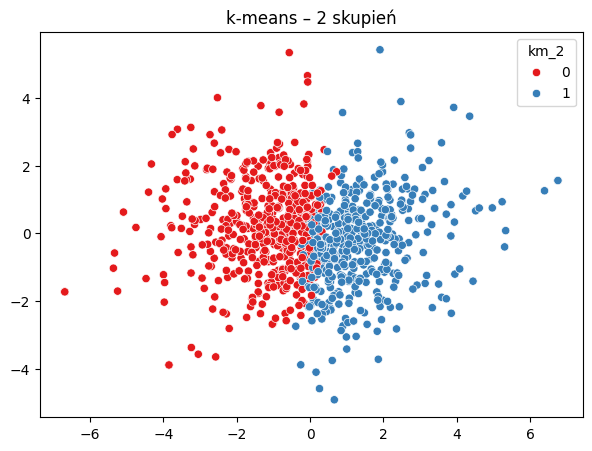

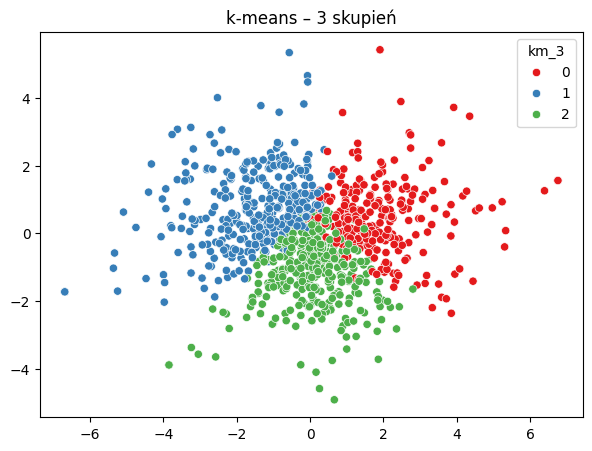

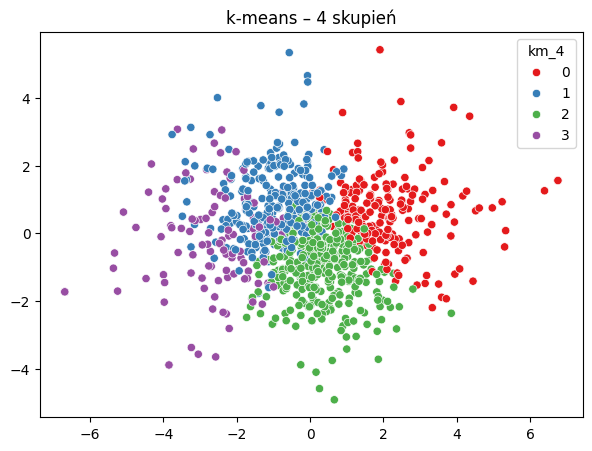

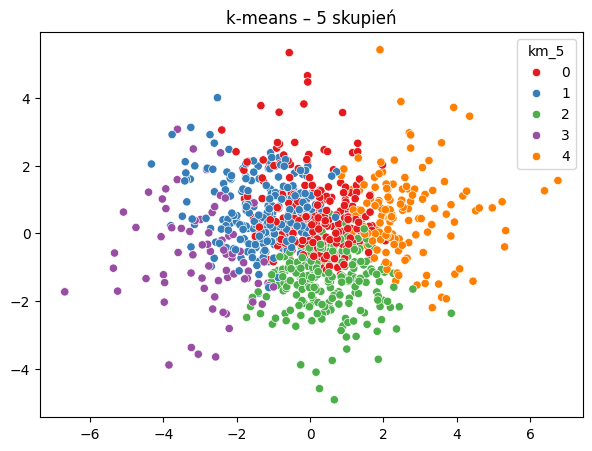

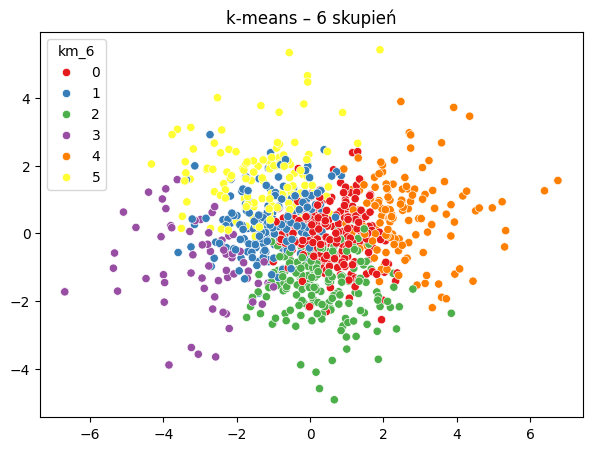

In [ ]:
# Grupowanie za pomocą metody k - średnich
km_models = {}
for k in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    km_models[f'km_{k}'] = kmeans.fit_predict(X)

df_km = pd.concat([df.reset_index(drop=True), pd.DataFrame(km_models)], axis=1)
print("\nprzykładowe przypisania segmentów (k-means):")
print(df_km.head())

for k in [2, 3, 4, 5, 6]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_km[f'km_{k}'], palette='Set1')
    plt.title(f'k-means – {k} skupień')
    plt.show()


silhouette scores: {2: 0.1123860590937904, 3: 0.07826924053732912, 4: 0.08184264710603159, 5: 0.08233317311816891, 6: 0.07596224917065314, 7: 0.06694190604156713, 8: 0.07395234809326848, 9: 0.07068207984415921, 10: 0.07002771867506535}


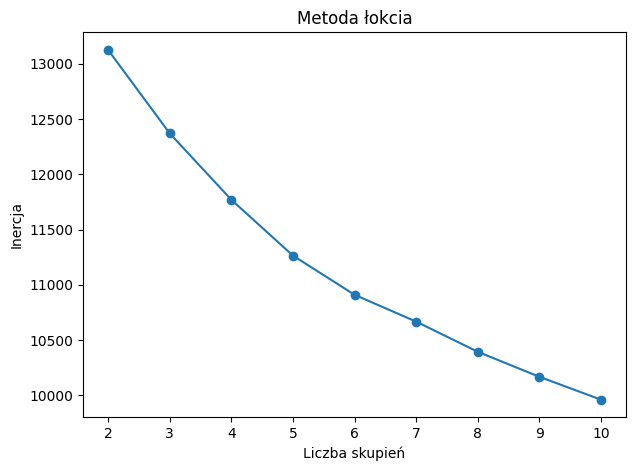

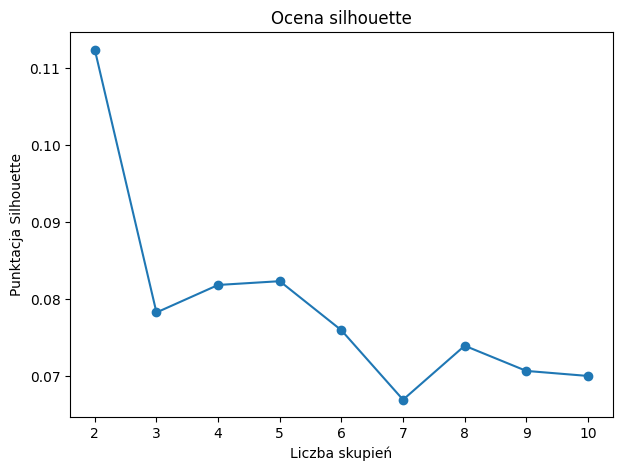

In [ ]:
#Dobór optymalnej liczby skupień metodą silhouette oraz łokcia
sil_scores = {}
inertia = {}
for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X)
    sil_scores[k] = silhouette_score(X, labels)
    inertia[k] = km.inertia_

print("\nsilhouette scores:", sil_scores)

plt.figure(figsize=(7,5))
plt.plot(list(inertia.keys()), list(inertia.values()), marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Inercja')
plt.title('Metoda łokcia')
plt.show()

plt.figure(figsize=(7,5))
plt.plot(list(sil_scores.keys()), list(sil_scores.values()), marker='o')
plt.xlabel('Liczba skupień')
plt.ylabel('Punktacja Silhouette')
plt.title('Ocena silhouette')
plt.show()

W przypadku grupowania hierarchicznego dendrogram pozwala dostrzec momenty większych skoków, co sugeruje, że model z 3 lub 4 skupieniami jest sensownym wyborem.

Przykładowe przypisania segmentów oraz ich wizualizacja na wykresach wskazują, że obserwacje są stosunkowo dobrze oddzielone. Drzewo decyzyjne, użyte do przewidywania segmentów w modelu z 3 skupieniami, osiąga wysoką dokładność, co potwierdza skuteczność tego podziału.

Dla metody k-średnich zarówno wykres „łokcia”, jak i wykres silhouette score wskazują, że optymalna liczba skupień to około 3 (czasem 4). Analizując wartość silhouette score oraz stabilność segmentacji, uznaję, że model k-means z 3 skupieniami jest najlepszym rozwiązaniem – jest prosty, zapewnia dobrą separację klastrów i jest łatwy do interpretacji w kontekście preferencji konsumentów dotyczących dań rybnych.